In [1]:
training_data_name = "califa"

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)#

    except RuntimeError as e:
        print(e)
        


In [3]:
print(gpus)
print("Kernel Loaded!")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Kernel Loaded!


In [4]:
#import tensorflow as tf
#from keras.backend.tensorflow_backend import set_session

#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)
#set_session(sess)

In [5]:
"""

This is for morphological classification of galaxies by CNN,
By Kenji Bekki, on 2020/2/14 for Nair & Abraham 2010

"""


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path


### Total model number = (nmodle0) * nmodel

#iset=int(input('Input the total number of sets of models '))
#nmodel0=int(input('Input the total number of images per model'))
#nmodel=nmodel0*iset
nmodel=2000
print('nmodel',nmodel)

### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
batch_size = 128
#num_classes = 5
num_classes = 2
epochs = 300
nb_epoch=epochs
n_mesh=100
#nmodel=1000
print('nmodel',nmodel)
print('num_classes',num_classes)

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh


print(img_rows, img_cols, n_mesh2)

input_shape = (img_rows, img_cols, 1)
print(input_shape)

nmodel 2000
nmodel 2000
num_classes 2
100 100 9999
(100, 100, 1)


In [6]:
%run ../utility/data_loading.ipynb
x_dataset, y_dataset, metadata = load_data(name=training_data_name)
nmodel = y_dataset.shape[0]
input_shape = x_dataset[0].shape
print(np.unique(y_dataset, return_counts = True))

2
Filename: ..\data\fits_testing\califa.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (1, 100, 100, 79)   float64   
  1                1 BinTableHDU     16   79R x 4C   [15A, D, D, 5A]   
None
1.0
(array([0, 1]), array([43, 36], dtype=int64))


In [7]:
#from tensorflow.keras.preprocessing.image import load_img, img_to_array
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

def default_datagen():
    datagen = ImageDataGenerator( fill_mode='constant', dtype=int)
    datagen.fit(data)
    return datagen

#datagen = default_datagen()
#datagen.fill_mode='nearest'
#datagen.horizontal_flip=True
#datagen.width_shift_range=0.2
#datagen.height_shift_range=0.2
#datagen.zoom_range=[0.8, 1.2]
#datagen.rotation_range=20
#datagen.shear_range=10
#datagen.brightness_range = [0.75, 1.5]

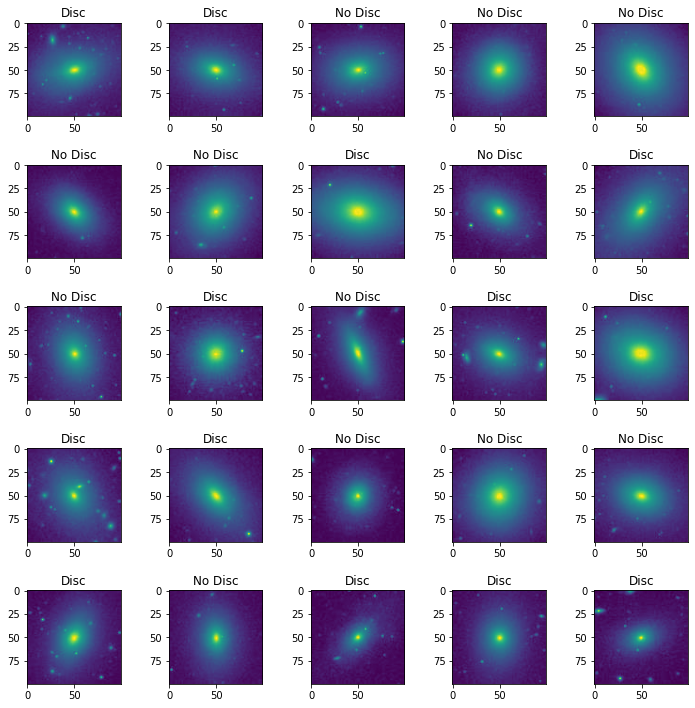

In [8]:
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams['figure.dpi'] = 72
%run ..\utility\plotting_helpers.ipynb
plot_classification_results(images=x_dataset, y_preds=y_dataset, y_trues=y_dataset, y_labels=("No Disc", "Disc"), random_sample=True)

In [9]:
#from sklearn import model_selection
#x_train, x_test, y_train, y_test = model_selection.train_test_split(x_dataset, y_dataset, train_size=1.0, random_state=1)

In [10]:
x_train = x_dataset
x_test = x_dataset
y_train = y_dataset
y_test = y_dataset

In [11]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0),
                  metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test), callbacks=[callback])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


print('save the architecture of a model')

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Epoch 1/300
1/1 [==============================] - 10s 10s/step - loss: 0.6960 - accuracy: 0.4557 - val_loss: 0.9126 - val_accuracy: 0.5443
Epoch 2/300
1/1 [==============================] - 0s 188ms/step - loss: 0.9127 - accuracy: 0.5443 - val_loss: 0.7998 - val_accuracy: 0.4557
Epoch 3/300
1/1 [==============================] - 0s 249ms/step - loss: 0.7811 - accuracy: 0.4557 - val_loss: 0.7007 - val_accuracy: 0.4557
Epoch 4/300
1/1 [==============================] - 0s 235ms/step - loss: 0.6960 - accuracy: 0.4557 - val_loss: 0.6955 - val_accuracy: 0.4557
Epoch 5/300
1/1 [==============================] - 1s 630ms/step - loss: 0.6917 - accuracy: 0.4304 - val_loss: 0.6919 - val_accuracy: 0.4557
Epoch 6/300
1/1 [==============================] - 0s 447ms/step - loss: 0.6961 - accuracy: 0.4810 - val_loss: 0.6896 - val_accuracy: 0.8101
Epoch 7/300
1/1 [==============================] - 0s 266ms/step - loss: 0.6870 - accuracy: 0.5949 - val_loss: 0.6886 - val_accuracy: 0.7468
Epoch 8/300
1/

KeyboardInterrupt: 

In [ ]:
def kf():
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits = 3, random_state = 2021, shuffle = True) 

    validation_accuracies = []

    for train_index, val_index in skf.split(np.zeros(x_dataset.shape[0]), y_dataset):
        print(len(train_index), len(val_index))
        x_train = x_dataset[train_index]
        y_train = y_dataset[train_index]
        x_test = x_dataset[val_index]
        y_test = y_dataset[val_index]

        y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
        callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)
        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                             activation='relu',
                             input_shape=input_shape),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])

        model.compile(loss=tf.keras.losses.categorical_crossentropy,
                          optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0),
                          metrics=['accuracy'])
        model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                  verbose=0, validation_data=(x_test, y_test), callbacks=[callback])
        score = model.evaluate(x_test, y_test, verbose=0)
        print('Test score:', score[0])
        print('Test accuracy:', score[1])

        validation_accuracies.append(score[1])

    mean_validation_accuracy = np.mean(validation_accuracies)
    print("MEAN val Accuracy: ", mean_validation_accuracy)

In [ ]:
from sklearn import metrics

true_data = y_test
predicted_data = model.predict(x_test)
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(true_data.argmax(axis=1), predicted_data.argmax(axis=1))).plot(cmap='Blues')

In [ ]:
from sklearn import metrics
class_labels=np.unique(metadata["class"])
true_data = y_test
predicted_data = model.predict(x_test)
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(true_data.argmax(axis=1), predicted_data.argmax(axis=1)),
                               display_labels=["E", "ES"]).plot(cmap='Blues')

In [ ]:
plot_classification_results(images=x_test, display_size=(3, 4), y_preds=predicted_data.argmax(axis=1), y_trues=y_test.argmax(axis=1),
                            y_labels=("E", "ES"),
                            galaxy_names=metadata["name"], random_sample=True)

In [ ]:
no_arg = model.predict(x_dataset[:1])
no_arg.argmax(axis=1)